#### About
Predictive maintenance system for industrial machinery

> Dataset - https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

In [84]:
#importing modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance


In [36]:
df_original = pd.read_csv('/home/suraj/ClickUp/Mar-Apr/data/predictive_maintenance.csv')
df = df_original

In [37]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [38]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [39]:
np.unique(df['Failure Type'].values.tolist())

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype='<U24')

In [40]:
np.unique(df['Type'].values.tolist())

array(['H', 'L', 'M'], dtype='<U1')

#### 1. Data pre-processing

In [41]:
# Drop missing values
df.dropna(inplace=True)


In [42]:
# Convert categorical label to numerical values
le = LabelEncoder()
df["Failure Type"] = le.fit_transform(df["Failure Type"])
# Print the mapping between the original labels and encoded labels
print("Original labels:", list(le.classes_))
print("Encoded labels:", list(le.transform(le.classes_)))



Original labels: ['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure']
Encoded labels: [0, 1, 2, 3, 4, 5]


In [43]:
df["Type"] = le.fit_transform(df["Type"])

In [44]:
np.unique(df['Failure Type'].values.tolist())

array([0, 1, 2, 3, 4, 5])

In [45]:
np.unique(df['Type'].values.tolist())

array([0, 1, 2])

In [46]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,1
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0,1
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,1
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0,1


In [47]:
#dropping product id and UDI
df = df.drop(['UDI','Product ID'],axis=1)

In [48]:
# Print the mapping between the original labels and encoded labels
print("Original labels:", list(le.classes_))
print("Encoded labels:", list(le.transform(le.classes_)))


Original labels: ['H', 'L', 'M']
Encoded labels: [0, 1, 2]


In [49]:
# Scale the data to ensure all features are on the same scale
scaler = StandardScaler()
df[df.columns[1:-1]] = scaler.fit_transform(df[df.columns[1:-1]])

In [50]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.187322,1
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,1
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,1
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,1
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,1
...,...,...,...,...,...,...,...,...
9995,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.187322,1
9996,0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.187322,1
9997,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.187322,1
9998,0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.187322,1


In [51]:
#The zscore function from SciPy is used to calculate the z-scores of each data point, and we keep only those data points that have a z-score of less than 3 in all columns. This will remove any data points that are more than three standard deviations away from the mean.
# Remove outliers using z-score
z_scores = zscore(df.drop("Failure Type", axis=1))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [52]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.187322,1
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,1
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,1
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,1
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,1
...,...,...,...,...,...,...,...,...
9995,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.187322,1
9996,0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.187322,1
9997,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.187322,1
9998,0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.187322,1


In [53]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

#### 2. Feature Engineering

In [54]:
# Create new features from the existing ones
df["Temperature_Difference"] = df["Process temperature [K]"] - df["Air temperature [K]"]
df["Power"] = df["Torque [Nm]"] * df["Rotational speed [rpm]"]
df["Power_Density"] = df["Power"] / df["Tool wear [min]"]



/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [55]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature_Difference,Power,Power_Density
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.187322,1,0.005030,0.019242,-0.011346
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,1,0.022434,-0.461980,0.280183
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,1,-0.062371,-0.214779,0.132790
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,1,-0.044966,0.028820,-0.018171
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,1,0.022434,-0.000958,0.000616
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.187322,1,-0.479744,-0.382743,0.259305
9996,0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.187322,1,-0.529740,-0.427071,0.298881
9997,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.187322,1,-0.444935,-0.391523,0.289942
9998,0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.187322,1,-0.377534,-0.622972,0.478026


#### 3. Exploratory Data Analysis

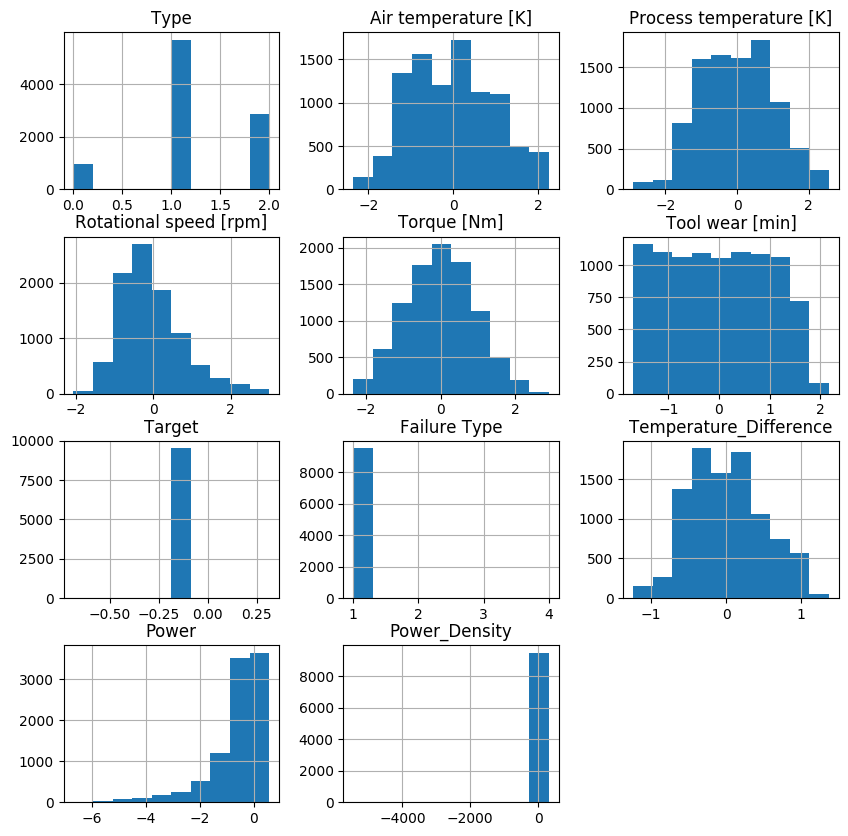

In [56]:
# Plot histograms of the numerical columns
df.hist(figsize=(10,10))
plt.show()

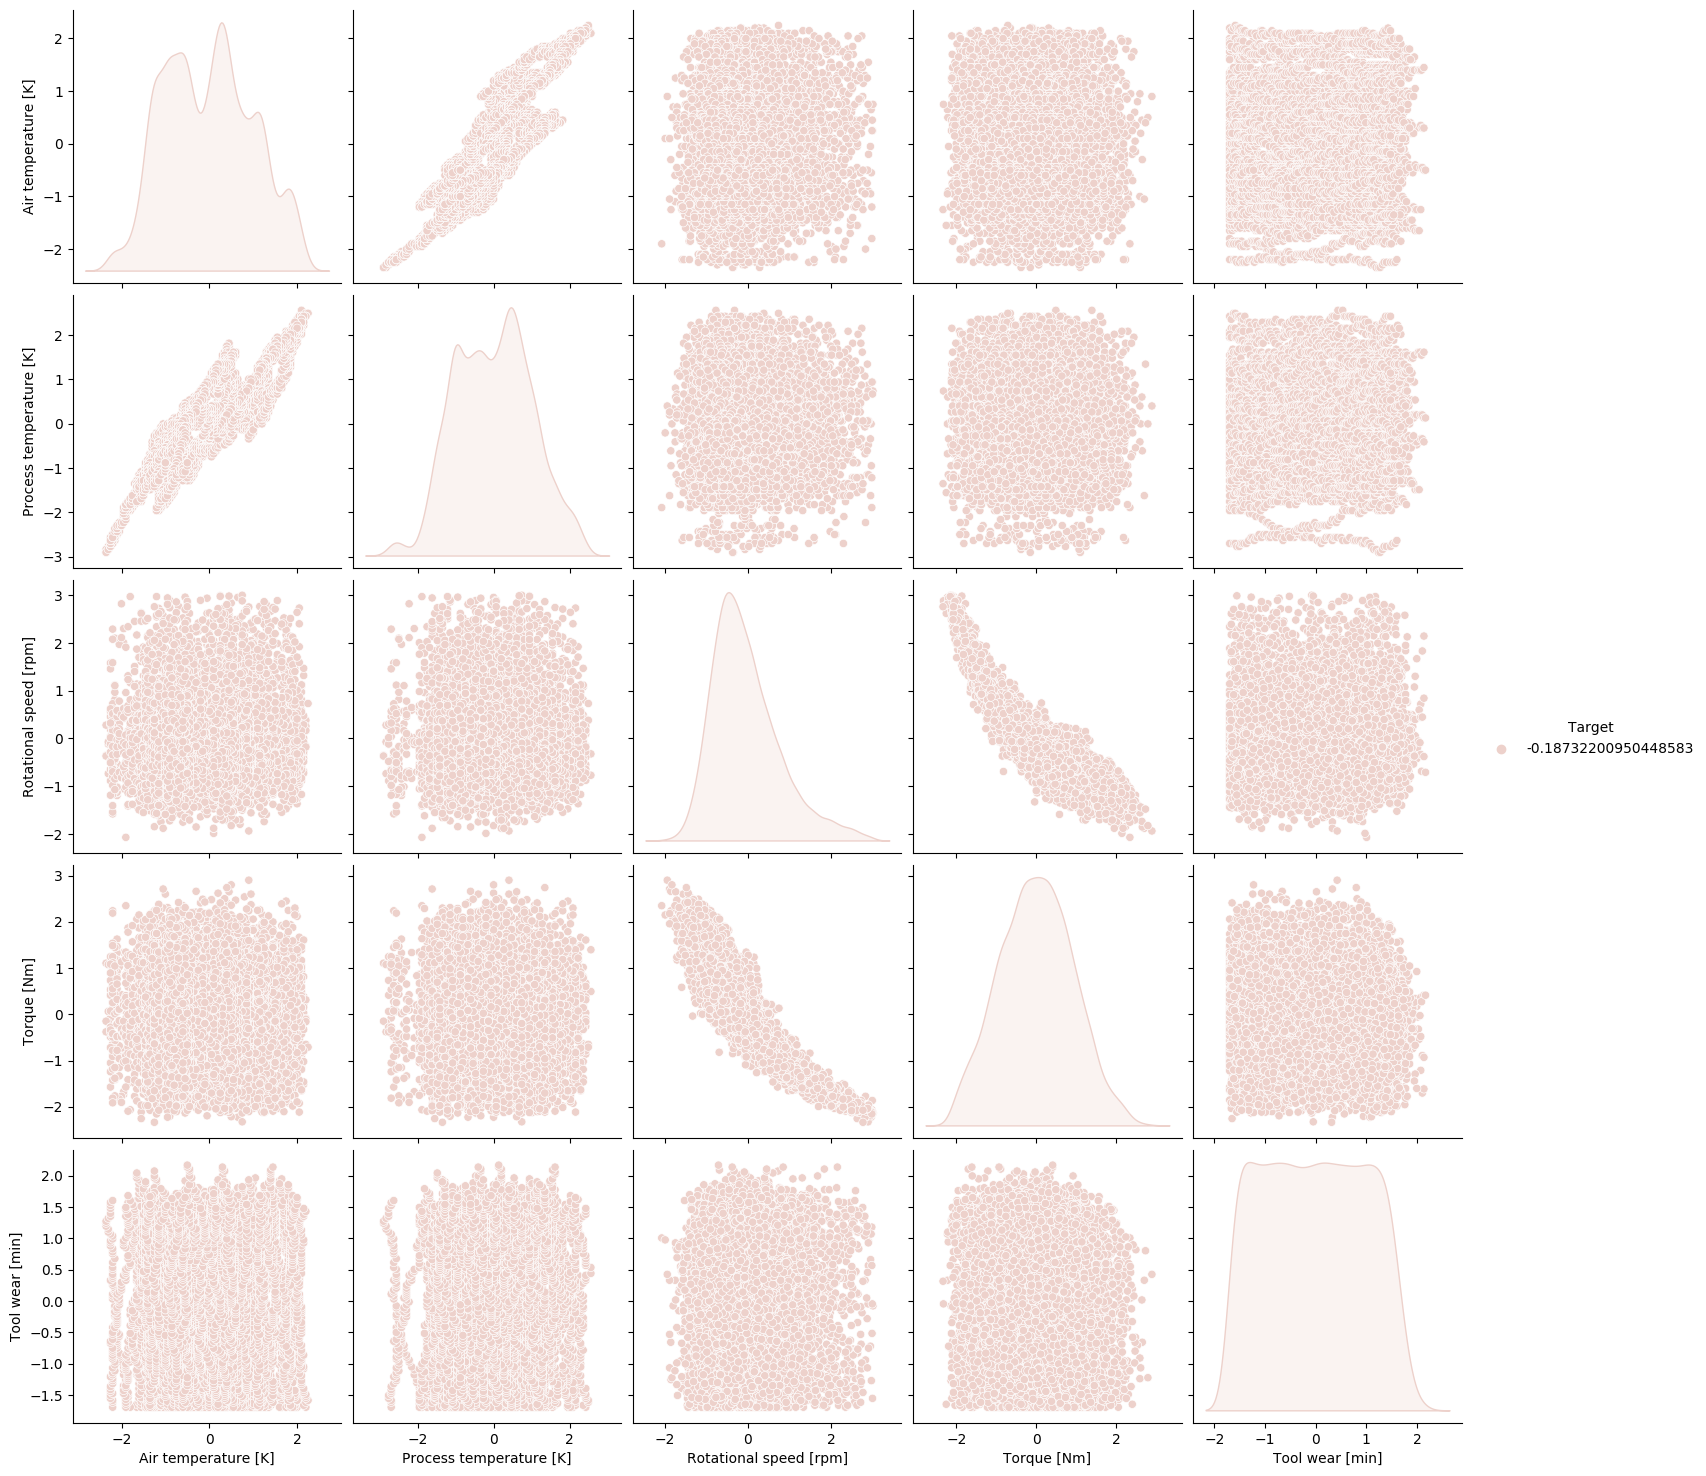

In [57]:
# Plot scatter plots of the numerical columns against the target
#the relationship between each pair of variables and the target variable. 
sns.pairplot(df, vars=["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"], hue="Target", height=3)
plt.show()


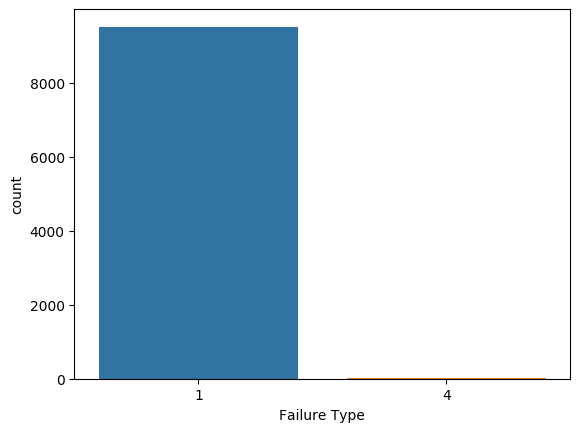

In [58]:
# Plot a bar chart of the failure types
sns.countplot(x="Failure Type", data=df)
plt.show()

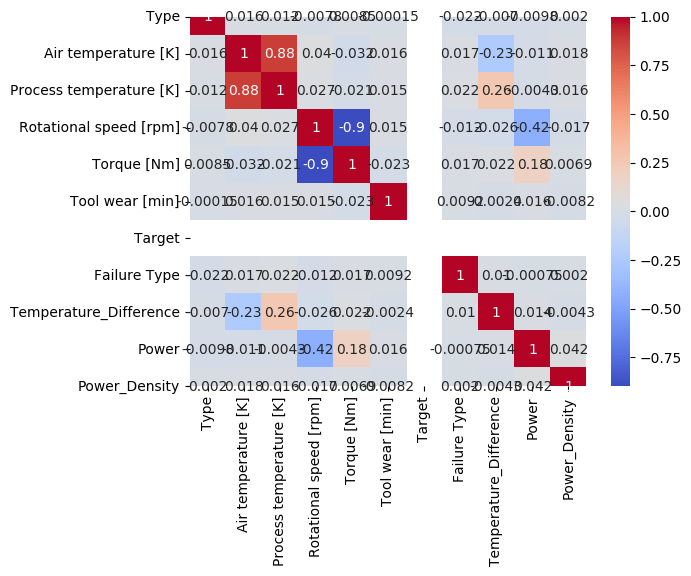

In [59]:

# Plot a heatmap of the correlations between the features
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [60]:
# Display the number of samples in each class
print(df["Failure Type"].value_counts())


1    9511
4      18
Name: Failure Type, dtype: int64


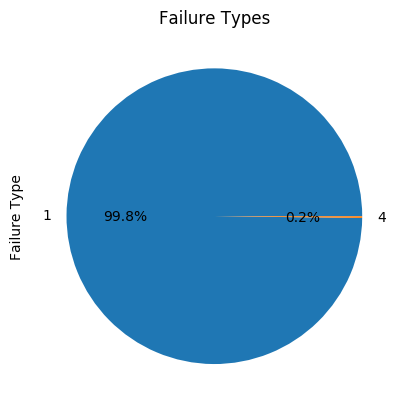

In [61]:
# Plot a pie chart of the failure types
df["Failure Type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Failure Types")
plt.show()


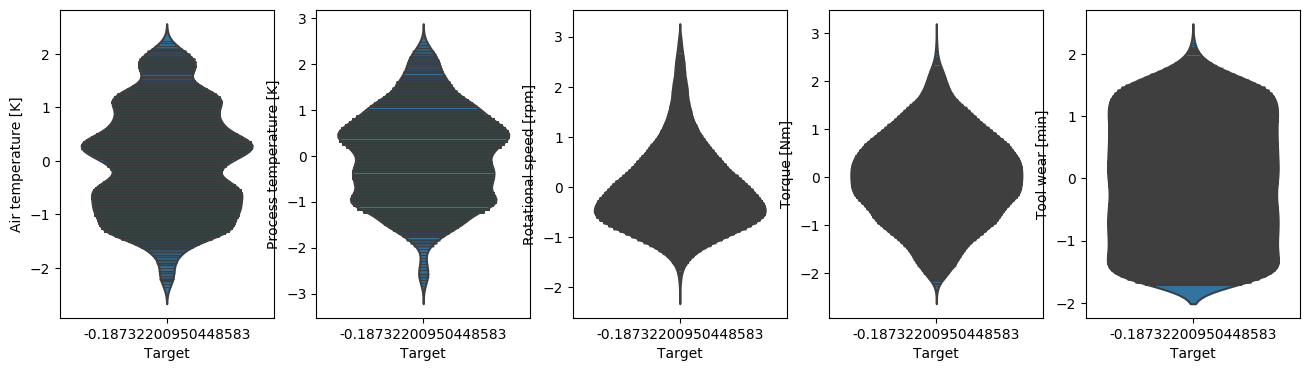

In [62]:
# Plot violin plots of the numerical columns grouped by the target
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for i, col in enumerate(["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]):
    sns.violinplot(x="Target", y=col, data=df, ax=axs[i], inner="stick")
plt.show()


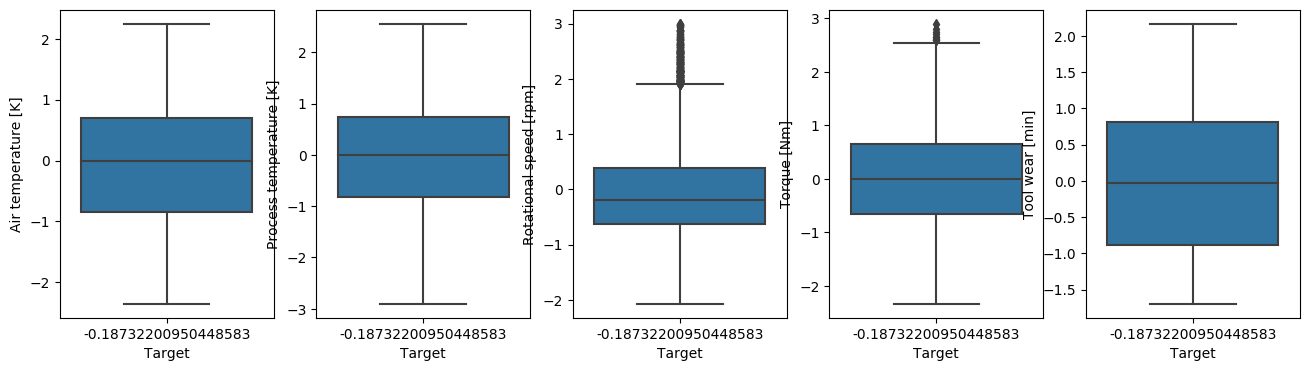

In [64]:
# Plot box plots of the numerical columns grouped by the target
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for i, col in enumerate(["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]):
    sns.boxplot(x="Target", y=col, data=df, ax=axs[i])
plt.show()

#### 4. Model Selection


In [67]:
# Define the features and target variable
X = df.drop(["Failure Type"], axis=1)
y = df["Failure Type"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Define the models to be evaluated
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier()
}



In [71]:
# Perform cross-validation and select the best model based on mean score
best_model = None
best_score = 0
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    print(f"{name} cross-validation score: {mean_score}")
    if mean_score > best_score:
        best_model = model
        best_score = mean_score

# Train and evaluate the best model on the test set
best_model.fit(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Best model ({type(best_model).__name__}) test score: {test_score}")


Decision Tree cross-validation score: 0.9964581558452734
Random Forest cross-validation score: 0.9981635041521448
Gradient Boosting cross-validation score: 0.99750768039241
Neural Network cross-validation score: 0.9981635041521448
Best model (RandomForestClassifier) test score: 0.9979013641133263


In [77]:
# Evaluate best model on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Test set accuracy:", accuracy)
print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)
print("Confusion matrix:\n", confusion_matrix)

Test set accuracy: 0.9979013641133263
Test set precision: 0.9958071324992376
Test set recall: 0.9979013641133263
Test set F1 score: 0.99685314839472
Confusion matrix:
 [[1902    0]
 [   4    0]]


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 5. Model Tuning

In [81]:
#model tuning for best model
# Define the parameter grid
param_grid = {
    'n_estimators': [10,50],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2]  # add more 
}

In [82]:
# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.9981635041521448


In [83]:
y_pred = grid_search.predict(X_test)

# Calculating precision, recall and F1 score of the tuned model
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Printing the results
print("Precision score: {:.2f}".format(precision))
print("Recall score: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Precision score: 0.50
Recall score: 0.50
F1 score: 0.50


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is less because we didn't do complete hyper param tuning with all probable set of params which takes time. Run
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Feature ranking:
1. feature 8 (0.184328)
2. feature 4 (0.145119)
3. feature 9 (0.137858)
4. feature 5 (0.122949)
5. feature 3 (0.101992)
6. feature 7 (0.101046)
7. feature 1 (0.092389)
8. feature 2 (0.080257)
9. feature 0 (0.034061)
10. feature 6 (0.000000)


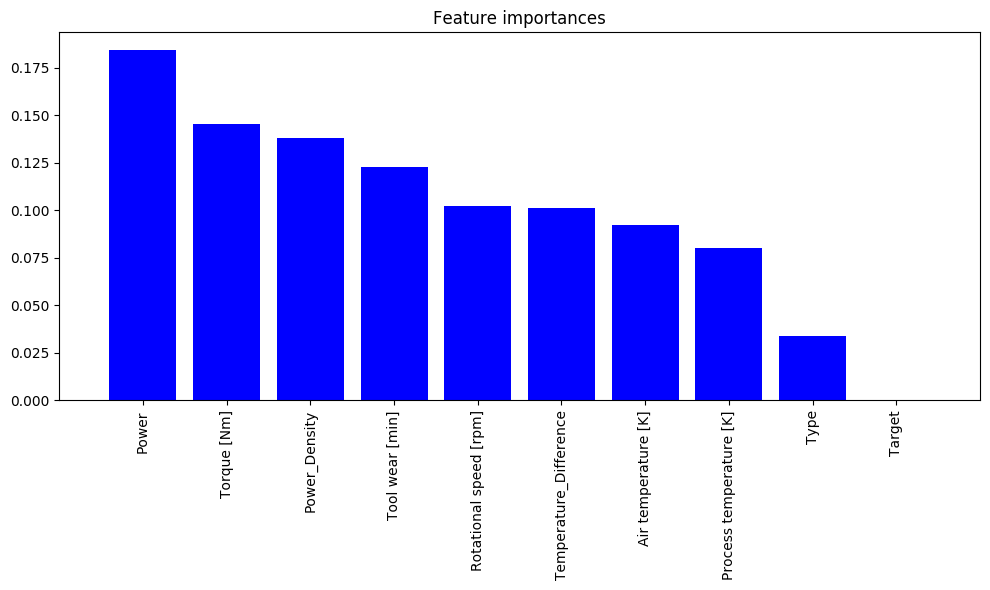

In [86]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances of the best model
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

#### Recommendations

Based on the feature importance of the Random Forest model, the top five features that are most important for predicting failures in the manufacturing process are Power, Torque(NM), Power_Density, Tool wear(mm), and Rotational_speed or Temperature difference.

Recommendations for the industrial manufacturing company would be to focus on these features and optimize them in order to prevent failures in the manufacturing process. Some potential recommendations could include:

1. Regular maintenance and calibration of machinery to ensure that the power and torque outputs are consistent and within the optimal range.

2. Monitoring and controlling the power density of the manufacturing process to prevent overheating and excessive wear and tear on machinery.

3. Implementing a tool wear tracking system to monitor the wear and tear of manufacturing tools and replace them before they become too worn to function effectively.

4. Controlling the rotational speed of the manufacturing process to prevent excessive wear and tear on machinery and reduce the likelihood of failures.

5. Monitoring the temperature difference in the manufacturing process to ensure that it remains within a safe and optimal range.

By focusing on these key features and implementing targeted optimization strategies, the industrial manufacturing company can potentially reduce the likelihood of failures in the manufacturing process and improve overall efficiency and productivity.